In [1]:
import pandas as pd
import torch

In [ ]:
df1 =  pd.read_csv("STOR_FANFIC_1000000_1086000.csv")

In [2]:
# laddar serien som en äkta serie
#author =  pd.read_csv("Series_fanfic", squeeze=True)

#EXPLICIT_Test_serie
author =  pd.read_csv("EXPLICIT_Test_serie", squeeze=True)

# Kommer här ifrån kolla nedan

In [ ]:
# https://www.kaggle.com/ab971631/beginners-guide-to-text-generation-pytorch

In [ ]:
# Sparar engelska och gör det till en serie med bara texten
#df1 = df1[df1["language"] == "English"]
#fan_text = df1["story"]
#export_csv = fan_text.to_csv (r'C:\\Users\\GTSA - Infinity\\Desktop\Series_fanfic', index = None, header=True)

In [24]:
lista

NameError: name 'lista' is not defined

In [3]:
author 

0       \n\nChapter Text\n\n\nseeing somi made jooe so...
1       \n\nChapter Text\n\n\nHello! I am doing reques...
2       \n\nChapter Text\n\n\nI Don't really see any f...
3       \n\nChapter Text\n\n\nAxe to the face.\n \nTha...
4       \n\nChapter Text\n\n\n\n\n\n\n\n\nGoddessVicky...
                              ...                        
2047    \n\nPink Ribbon\n\n\n\n\n\n\nvioletnudewoman\n...
2048    \n\nChapter Text\n\n\nI’ll keep this simple:\n...
2049    \n\nChapter Text\n\n\nBlaine hated movie theat...
2050    They weren’t ten miles from the asylum when Ch...
2051                     \n\nChapter Text\n\n\n\n\n\n\n\n
Name: story, Length: 2052, dtype: object

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
import unidecode
import random
import torch

In [5]:
# Check if GPU is available
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
else: 
    print('No GPU available, training on CPU; consider making n_epochs very small.')

Training on GPU!


In [6]:
text = list(author[:100])
def joinStrings(text):
    return ' '.join(string for string in text)
text = joinStrings(text)
# text = [item for sublist in author[:5].values for item in sublist]
len(text.split())

22098

In [7]:
stop = set(nltk.corpus.stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = nltk.stem.wordnet.WordNetLemmatizer()
def clean(doc):
        stop_free = " ".join([i for i in doc.split() if i not in stop])
        punc_free = "".join(ch for ch in stop_free if ch not in exclude)
        normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
        return normalized
test_sentence = clean(text).lower().split()

In [8]:
trigrams = [([test_sentence[i], test_sentence[i + 1]], test_sentence[i + 2])
            for i in range(len(test_sentence) - 2)]
chunk_len=len(trigrams)
print(trigrams[:3])

[(['chapter', 'text'], 'seeing'), (['text', 'seeing'], 'somi'), (['seeing', 'somi'], 'made')]


In [9]:
vocab = set(test_sentence)
voc_len=len(vocab)
word_to_ix = {word: i for i, word in enumerate(vocab)}

In [10]:
inp=[]
tar=[]
for context, target in trigrams:
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
        inp.append(context_idxs)
        targ = torch.tensor([word_to_ix[target]], dtype=torch.long)
        tar.append(targ)

In [11]:
import torch
import torch.nn as nn
from torch.autograd import Variable

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        
        self.encoder = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size*2, hidden_size, n_layers,batch_first=True,
                          bidirectional=False)
        self.decoder = nn.Linear(hidden_size, output_size)
    
    def forward(self, input, hidden):
        input = self.encoder(input.view(1, -1))
        output, hidden = self.gru(input.view(1, 1, -1), hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden

    def init_hidden(self):
        return Variable(torch.zeros(self.n_layers, 1, self.hidden_size))

In [12]:
def train(inp, target):
    hidden = decoder.init_hidden().cuda()
    decoder.zero_grad()
    loss = 0
    
    for c in range(chunk_len):
        output, hidden = decoder(inp[c].cuda(), hidden)
        loss += criterion(output, target[c].cuda())

    loss.backward()
    decoder_optimizer.step()

    return loss.data.item() / chunk_len

In [13]:
import time, math

def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [14]:
n_epochs = 300
print_every = 100
plot_every = 10
hidden_size = 100
n_layers = 1
lr = 0.015

decoder = RNN(voc_len, hidden_size, voc_len, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0
if(train_on_gpu):
    decoder.cuda()
for epoch in range(1, n_epochs + 1):
    loss = train(inp,tar)       
    loss_avg += loss

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 50, loss))
#         print(evaluate('ge', 200), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

 8s (100 16%) 0.0033]
 1s (200 33%) 0.0024]
 49s (300 50%) 0.0021]


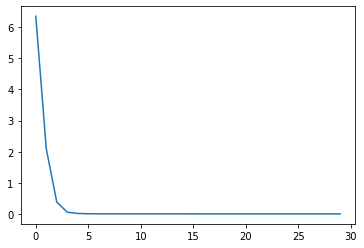

In [15]:


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(all_losses)



In [16]:


def evaluate(prime_str='this process', predict_len=100, temperature=0.8):
    hidden = decoder.init_hidden().cuda()

    for p in range(predict_len):
        
        prime_input = torch.tensor([word_to_ix[w] for w in prime_str.split()], dtype=torch.long).cuda()
        inp = prime_input[-2:] #last two words as input
        output, hidden = decoder(inp, hidden)
        
        # Sample from the network as a multinomial distribution
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]
        
        # Add predicted word to string and use as next input
        predicted_word = list(word_to_ix.keys())[list(word_to_ix.values()).index(top_i)]
        prime_str += " " + predicted_word
#         inp = torch.tensor(word_to_ix[predicted_word], dtype=torch.long)

    return prime_str



In [18]:
print(evaluate('this process', 40, temperature=1))

this process gabriels let i help people that winwin you tilted head aside smiled bertholdt groaned looked lover arm tied head leg opened spreader bar youve little shit today slut brat like that looks like master gonna fuck sense you all able


In [22]:
print(evaluate('love you', 30, temperature=1))

love you think ive bit depressed while though as in couple year so many story sit unfinished podfic agh i let sit moldering year i make deal it even though i love


NameError: name 'test' is not defined